<a href="https://colab.research.google.com/github/Nckflannery/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

## Replicate lesson code

In [0]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [7]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


In [8]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [9]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [0]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [0]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [10]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [11]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


In [12]:
print(income.shape)
print(lifespan.shape)

(46513, 3)
(44370, 3)


In [0]:
merged = pd.merge(income, lifespan)

In [14]:
print(merged.shape)
merged.head()

(40437, 4)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [15]:
merged.duplicated(subset=['geo', 'time']).value_counts()

False    40437
dtype: int64

In [16]:
merged['geo'].nunique() == len(merged['geo'])

False

In [0]:
df = pd.merge(merged, population)

In [18]:
print(df.shape)
df.head()

(40437, 5)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [0]:
df1 = pd.merge(df, entities[['country','name', 'world_4region', 'world_6region']], left_on='geo', right_on='country')

In [20]:
df1

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_4region,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia
5,afg,1805,603,28.16,3280000,afg,Afghanistan,asia,south_asia
6,afg,1806,603,28.15,3280000,afg,Afghanistan,asia,south_asia
7,afg,1807,603,28.14,3280000,afg,Afghanistan,asia,south_asia
8,afg,1808,603,28.13,3280000,afg,Afghanistan,asia,south_asia
9,afg,1809,603,28.12,3280000,afg,Afghanistan,asia,south_asia


In [21]:
df1 = df1.rename(columns = {
   'country': 'country_code',
   'time': 'year',
   'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
   'life_expectancy_years': 'lifespan',
   'population_total': 'population',
   'name': 'country',
   'world_6region': '6region',
   'world_4region': '4region'
})
df1.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [22]:
df1.dtypes

geo              object
year              int64
income            int64
lifespan        float64
population        int64
country_code     object
country          object
4region          object
6region          object
dtype: object

In [23]:
df1.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [24]:
usa = df1[df1.country == 'United States']
usa.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
38028,usa,1800,2127,39.41,6801854,usa,United States,americas,america
38029,usa,1801,2167,39.41,6933517,usa,United States,americas,america
38030,usa,1802,2202,39.41,7067728,usa,United States,americas,america
38031,usa,1803,2166,39.41,7204538,usa,United States,americas,america
38032,usa,1804,2165,39.41,7343995,usa,United States,americas,america


In [25]:
usa.describe()

,year,income,lifespan,population
count,219.000000,219.000000,219.000000,2.190000e+02
mean,1909.000000,14572.936073,54.846256,1.163662e+08
std,63.364028,15066.042247,15.202079,9.738644e+07
min,1800.000000,2113.000000,31.000000,6.801854e+06
25%,1854.500000,3512.500000,39.410000,2.752198e+07
50%,1909.000000,7989.000000,51.780000,9.236198e+07
75%,1963.500000,20090.500000,70.270000,1.962540e+08
max,2018.000000,54898.000000,79.140000,3.267667e+08


In [0]:
usa1 = usa[usa.year.isin([1818, 1918, 2018])]

In [0]:
china = df1[df1.country == 'China']

In [28]:
china.describe()

,year,income,lifespan,population
count,219.000000,219.000000,219.000000,2.190000e+02
mean,1909.000000,1735.100457,41.437489,6.060697e+08
std,63.364028,2583.720237,15.799616,3.308813e+08
min,1800.000000,530.000000,22.130000,3.216750e+08
25%,1854.500000,935.000000,31.790000,3.842179e+08
50%,1909.000000,985.000000,32.000000,4.216460e+08
75%,1963.500000,1055.000000,51.345000,6.993707e+08
max,2018.000000,16018.000000,76.920000,1.415046e+09


In [0]:
china1 = china[china.year.isin([1818, 1918, 2018])]

In [0]:
import seaborn as sns

now = df1[df1.year == 2018]

now.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
218,afg,2018,1867,58.69,36373176,afg,Afghanistan,asia,south_asia
437,ago,2018,5846,65.19,30774205,ago,Angola,africa,sub_saharan_africa
656,alb,2018,12424,78.01,2934363,alb,Albania,europe,europe_central_asia
922,are,2018,68231,76.89,9541615,are,United Arab Emirates,asia,middle_east_north_africa
1141,arg,2018,18942,76.97,44688864,arg,Argentina,americas,america


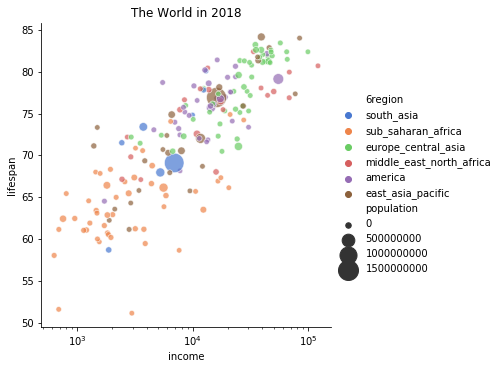

In [0]:
sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
            data=now, sizes=(30,400), palette='muted', alpha=.7)
plt.xscale('log')
plt.title('The World in 2018');

##Actual Assignment

###Load in matplotlib, numpy, pandas, seaborn and Datasets

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

###Let's look for something interesting we could plot/tell a story about

In [7]:
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [8]:
# main religion looks interesting, let's see what it looks like
entities['main_religion_2008'].value_counts()

christian            153
muslim                48
eastern_religions     15
Name: main_religion_2008, dtype: int64

###Let's compare the health and average income grouping the countries by their main religion

In [0]:
# Start by merging dataframes
merged = pd.merge(income, lifespan)

In [10]:
merged.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [0]:
merged1 = pd.merge(merged, population)

In [48]:
merged1.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [0]:
# Now merge that with entities keeping only the pertinent columns
df = pd.merge(merged1, entities[['main_religion_2008', 'country', 'name']], left_on='geo', right_on='country')

In [14]:
print(df.shape)
df.head()

(40437, 8)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,main_religion_2008,country,name
0,afg,1800,603,28.21,3280000,muslim,afg,Afghanistan
1,afg,1801,603,28.20,3280000,muslim,afg,Afghanistan
2,afg,1802,603,28.19,3280000,muslim,afg,Afghanistan
3,afg,1803,603,28.18,3280000,muslim,afg,Afghanistan
4,afg,1804,603,28.17,3280000,muslim,afg,Afghanistan


In [0]:
# Clean up column names
df = df.rename(columns= {
    'time' : 'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted' : 'income',
    'life_expectancy_years' : 'lifespan',
    'population_total' : 'population',
    'main_religion_2008' : 'religion',
    'country' : 'country_code',
    'name' : 'country'
})

In [16]:
df.head()

,geo,year,income,lifespan,population,religion,country_code,country
0,afg,1800,603,28.21,3280000,muslim,afg,Afghanistan
1,afg,1801,603,28.20,3280000,muslim,afg,Afghanistan
2,afg,1802,603,28.19,3280000,muslim,afg,Afghanistan
3,afg,1803,603,28.18,3280000,muslim,afg,Afghanistan
4,afg,1804,603,28.17,3280000,muslim,afg,Afghanistan


In [0]:
merge2 = pd.merge(merged1, entities[['country', 'name', 'world_4region']], left_on='geo', right_on='country')

In [0]:
# Clean up column names
merge2 = merge2.rename(columns= {
    'time' : 'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted' : 'income',
    'life_expectancy_years' : 'lifespan',
    'population_total' : 'population',    
    'country' : 'country_code',
    'name' : 'country',
    'world_4region' : 'region'
})

In [64]:
merge2

,geo,year,income,lifespan,population,country_code,country,region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia
5,afg,1805,603,28.16,3280000,afg,Afghanistan,asia
6,afg,1806,603,28.15,3280000,afg,Afghanistan,asia
7,afg,1807,603,28.14,3280000,afg,Afghanistan,asia
8,afg,1808,603,28.13,3280000,afg,Afghanistan,asia
9,afg,1809,603,28.12,3280000,afg,Afghanistan,asia


In [0]:
#every 10 years from 1800
years = list(range(1800,2020, 10))

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


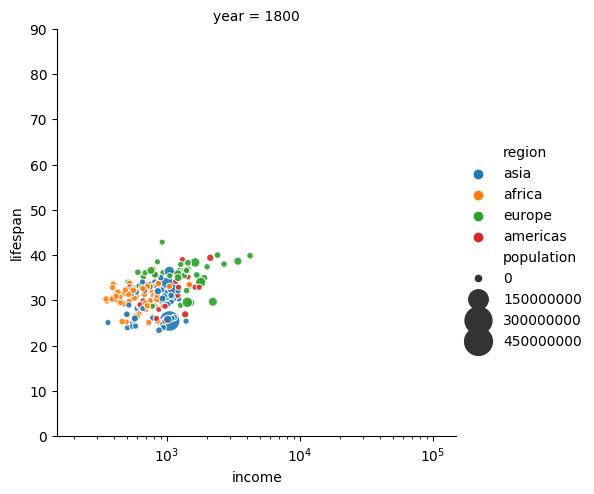

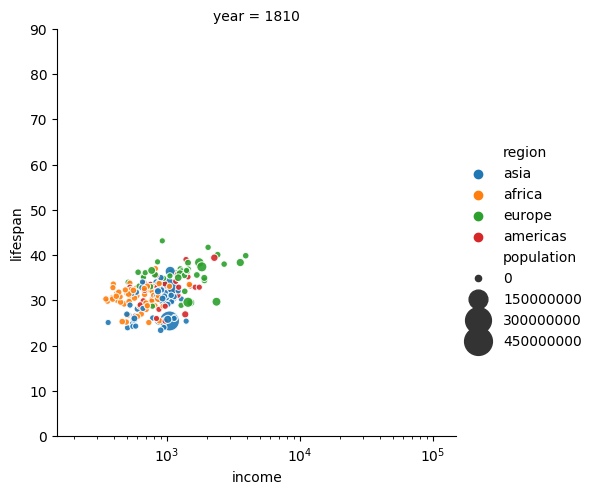

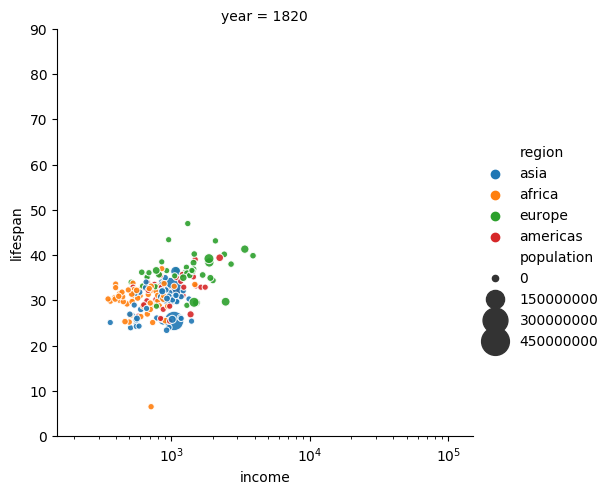

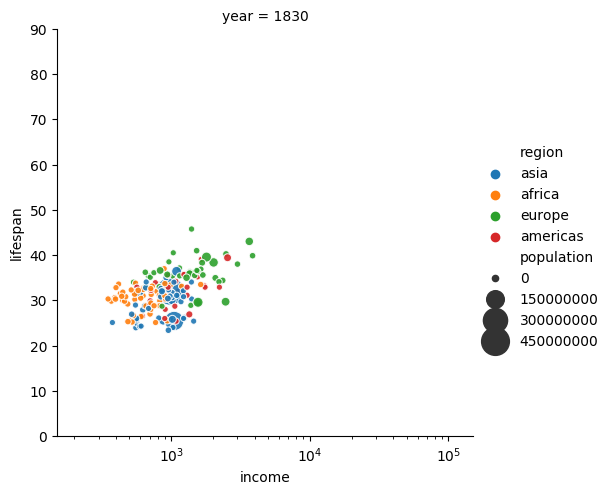

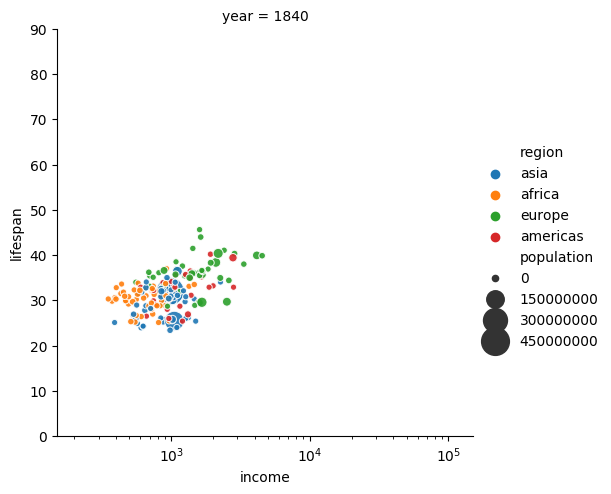

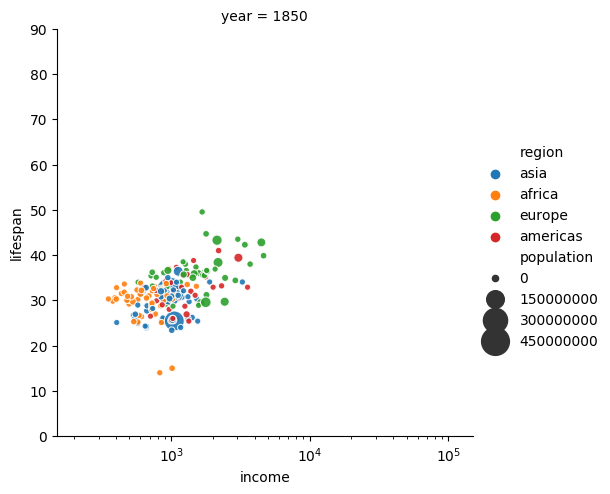

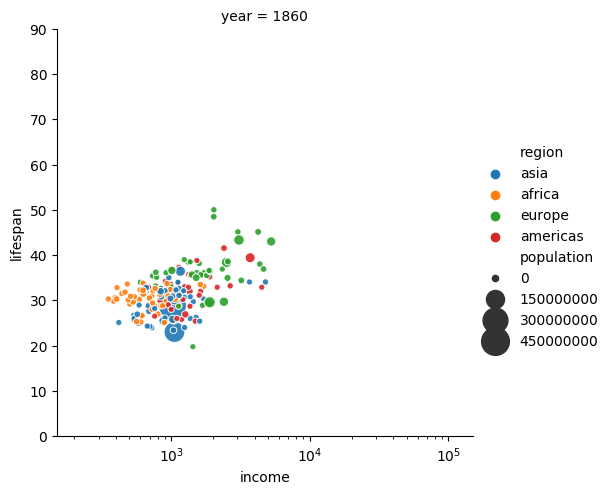

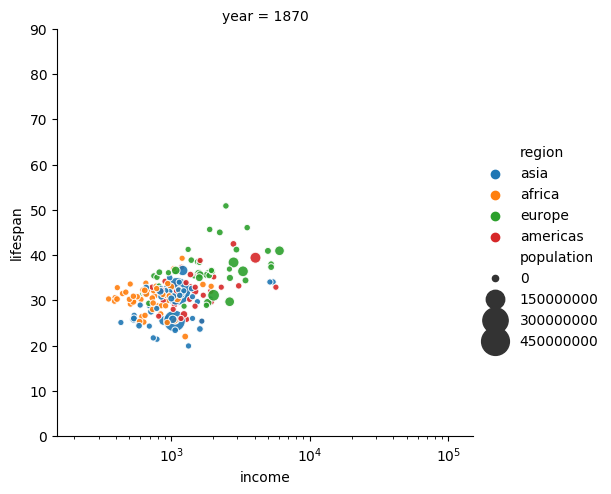

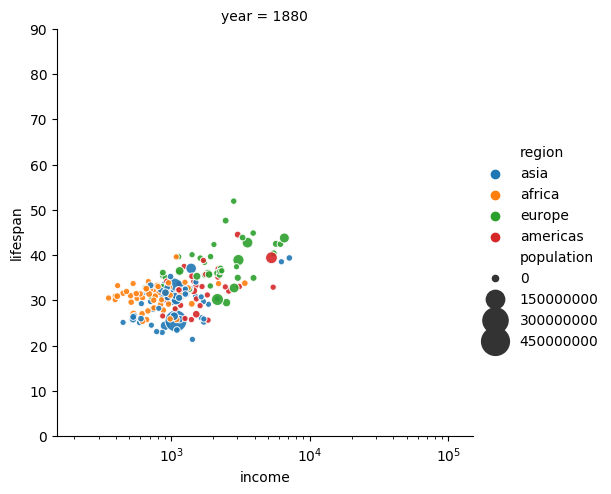

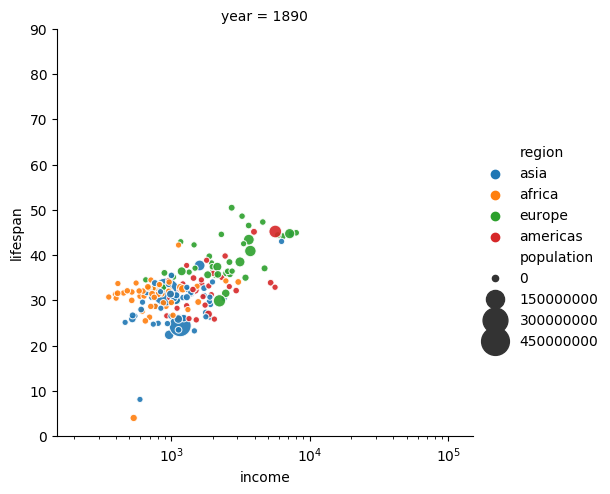

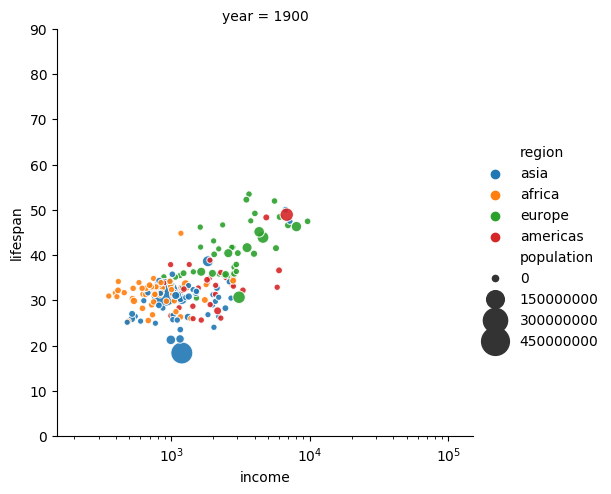

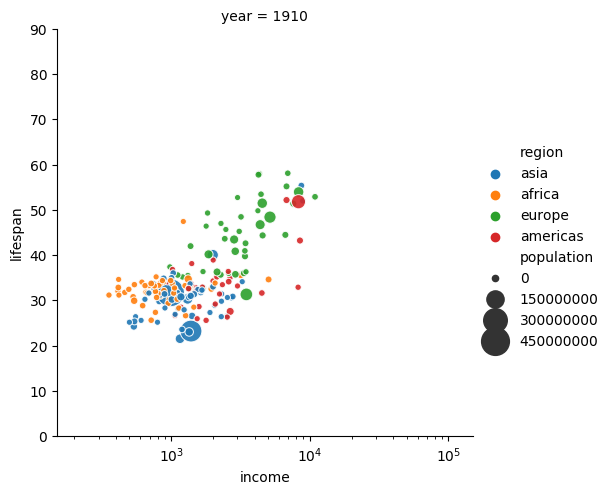

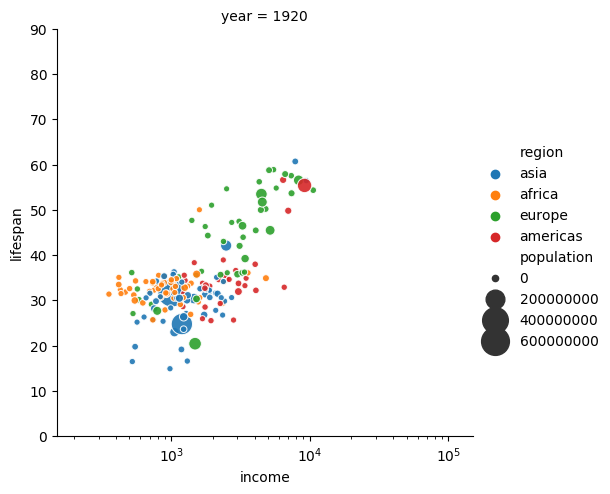

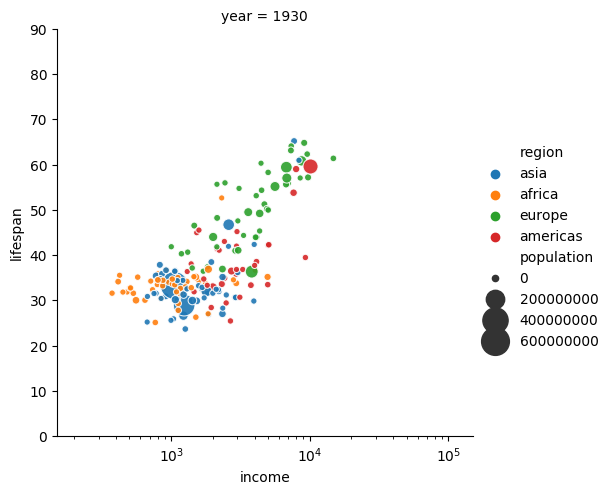

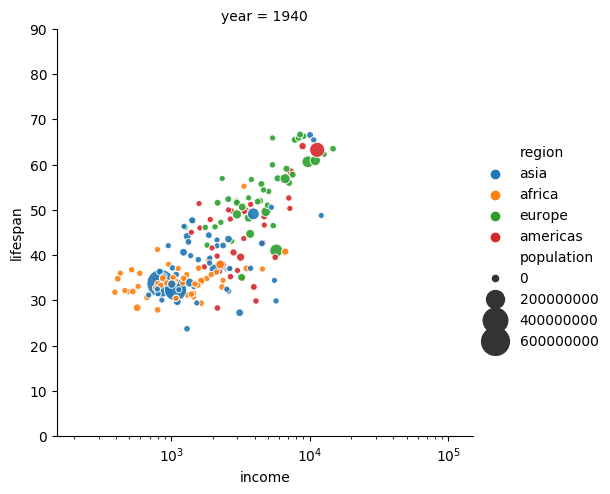

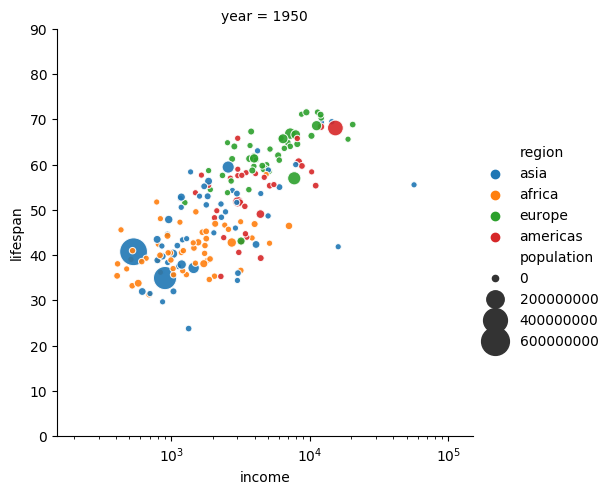

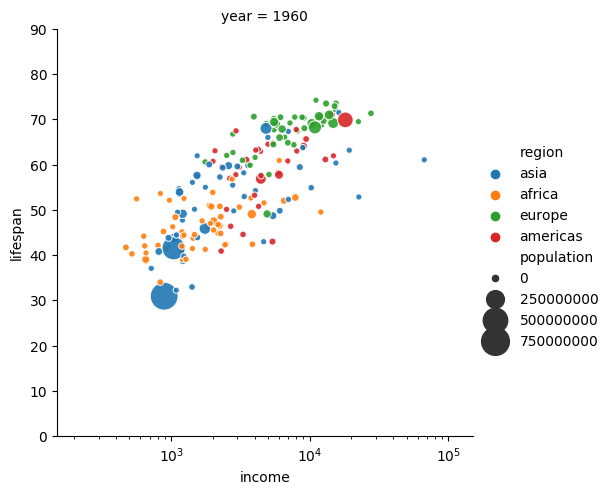

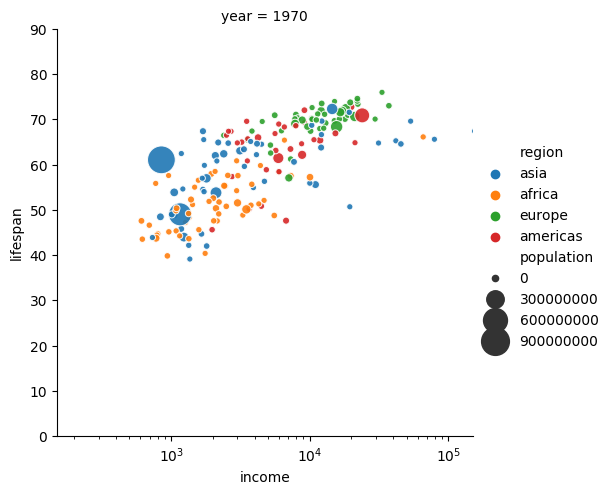

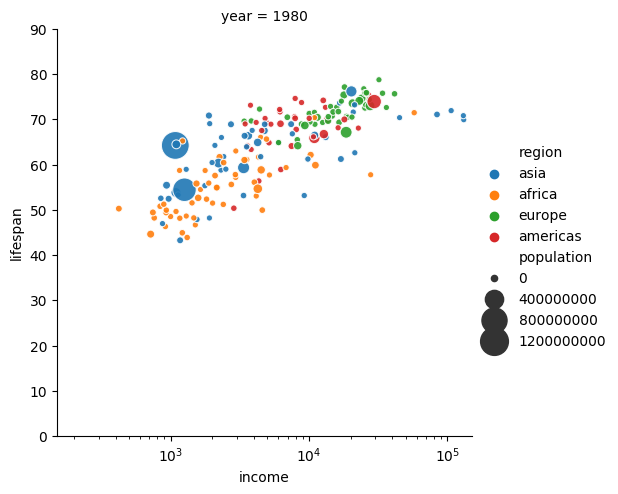

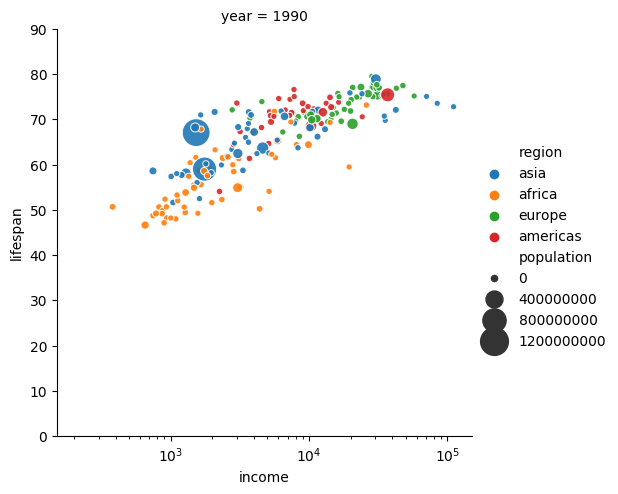

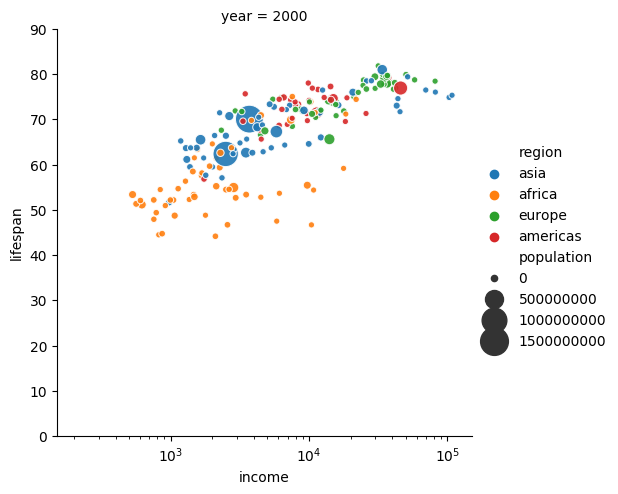

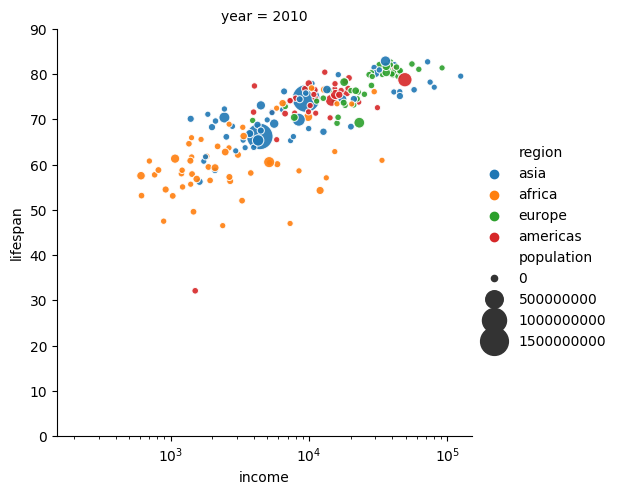

In [127]:
plt.style.use('default')
for i in years:
  sns.relplot(x='income', y='lifespan', hue='religion', size='population',
            sizes=(20,400), alpha=.9, data=df[df['year']==i], col='year')
  plt.xscale('log')
  #plt.yscale('log')
  plt.xlim((150, 150000))
  plt.ylim((0, 90))
# for i in years:
#   sns.relplot(x='income', y='lifespan', hue='region', size='population', 
#               sizes=(20,400), alpha=.9, data=merge2[merge2['year']==i], col='year')
#   plt.xscale('log')
#   #plt.yscale('log')
#   plt.xlim((150, 150000))
#   plt.ylim((0, 90))

In [0]:
# # Let's try to plot these side by side
# df_religion = df[df['year'].isin(years)]
# df_merge2 = merge2[merge2['year'].isin(years)]

In [0]:
# row_count = df_religion.year.nunique()

In [0]:
# fig, ax = plt.subplots(row_count, 2, squeeze=False, sharex='col')

# for i in years:
#   rows= int((i-years[0])/10)
#   ax[rows, 0] = sns.relplot(x='income', y='lifespan', hue='religion', size='population',
#           sizes=(20,400), alpha=.9, data=df[df['year']==i], col='year')
#   plt.xscale('log')
#   plt.xlim((150, 150000))
#   plt.ylim((0, 90))
# for j in years:
#   rows= int((j-years[0])/10)
#   ax[rows, 1] = sns.relplot(x='income', y='lifespan', hue='region', size='population', 
#               sizes=(20,400), alpha=.9, data=merge2[merge2['year']==j], col='year')
#   plt.xscale('log')
#   plt.xlim((150, 150000))
#   plt.ylim((0, 90))


##### CAN'T FIGURE OUT HOW TO GET THESE TO PLOT SIDE BY SIDE #######

# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [0]:
# TODO